Using TensorFlow backend.


NameError: name 'y_case_fin' is not defined

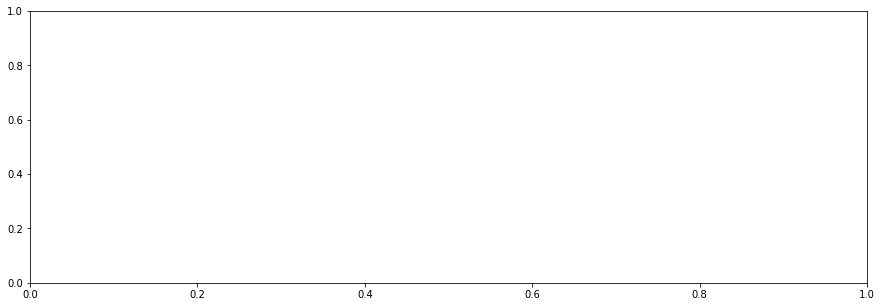

In [3]:
import sys
sys.path.append("../../")
import numpy as np
import datetime as dt

import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pandas as pd
import xarray as xr
import keras

# from python.aux.utils_floodmodel import add_time, generate_prediction_array, remove_outlier, multi_forecast_case_study
# from python.aux.plot import plot_multif_prediction

fig, ax = plt.subplots(figsize=(15, 5))
color_scheme = ['g', 'cyan', 'magenta', 'k']

y_case_fin.to_pandas().plot(ax=ax, label='reanalysis', lw=4)
run = 0
for i in X_multifr_fin.num_of_forecast:
    X_multif_fin.sel(num_of_forecast=i).to_pandas().T.plot(ax=ax, 
                                                           label='forecast', 
                                                           linewidth=2,
                                                           color='firebrick')
    X_multifr_fin.sel(num_of_forecast=i).to_pandas().T.plot(ax=ax, 
                                                            label='frerun', 
                                                            linewidth=0.9,
                                                            linestyle='--', 
                                                            color=color_scheme[run])
    run += 1
ax.set_ylabel('river discharge [m$^3$/s]')

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='b', lw=4),
                Line2D([0], [0], color='firebrick', lw=2),
                Line2D([0], [0], color='g', linestyle='--'),
                Line2D([0], [0], color='cyan', linestyle='--'),
                Line2D([0], [0], color='magenta', linestyle='--'),
                Line2D([0], [0], color='k', linestyle='--')]
                
legendlabels = ['reanalysis', 'neural net', 'EFAS 05-18', 'EFAS 05-22', 'EFAS 05-25', 'EFAS 05-29']
ax.legend(custom_lines, legendlabels, fontsize=11)

plt.title('Setting: Time-Delay Neural Net: 64 hidden nodes, dropout 0.25');

In [4]:
import xarray as xr

In [7]:
xr.open_dataset('./elbeglofas.nc')

<xarray.Dataset>
Dimensions:                                 (features: 1, points: 48, time: 2557)
Coordinates:
  * features                                (features) object 'dis24'
  * time                                    (time) datetime64[ns] 1999-01-01 ... 2005-12-31
    latitude                                (points) float64 ...
    longitude                               (points) float64 ...
Dimensions without coordinates: points
Data variables:
    stack-348bd7b6f7979e8eb8fcc3912e42613a  (points, time, features) float32 ...